## ASSIGNMENT 4 
### Part 2

#### Exercise 2.1

In the AdaBoost.M1 algorithm, in each step a base-learner is added to the
ensemble with a weight that depends on its (weighted) error. Derive this
weight of the added tree, Equation 10.12 on page 344 of The Elements of
Statistical Learning (Exercise 1, Chapter 10).

We start from the expression 10.11


$$(e^β − e^{−β})\: \Sigma{^n}_{i=1}w^{(m)}_i \mathrm{I}(y_i \neq G_m (x_i)) + e^{-β}\:\Sigma{^n}_{i=1}w^{(m)}_i$$


To minimize this expression we will have to take the derivative and set it to 0 and then solve for $\beta$



$$(e^β + e^{-β})\: \Sigma{^n}_{i=1}w^{(m)}_i \mathrm{I}(y_i \neq G_m (x_i)) - e^{-β}\:\Sigma{^n}_{i=1}w^{(m)}_i\:=\:0$$


Then to make it simpler we mulitply by $e^β$ . The expression then becomes:


$$(e^{2β} + 1)\: \Sigma{^n}_{i=1}w^{(m)}_i \mathrm{I}(y_i \neq G_m (x_i)) - \:\Sigma{^n}_{i=1}w^{(m)}_i\:=\:0$$


Therefore we will have that $e^{2β} $ is:


$$e^{2β}=\frac{\Sigma{^n}_{i=1}w^{(m)}_i \:-\: \Sigma{^n}_{i=1}w^{(m)}_i \mathrm{I}(y_i \neq G_m (x_i)) }{\Sigma{^n}_{i=1}w^{(m)}_i \mathrm{I}(y_i \neq G_m (x_i))}$$


Now we know that the $err_m$ is defined as:


$$err_m= \frac{\Sigma{^n}_{i=1}w^{(m)}_i \mathrm{I}(y_i \neq G_m (x_i))}{\Sigma{^n}_{i=1}w^{(m)}_i}$$


So we can just substitute this expression. Therefore the $e^{2\beta}$ becomes:

$$e^{2β}=\frac{1}{err_m}-1=\frac{1-err_m}{err_m}$$

Now we can just solve for $\beta$: 


$$\beta=\frac{1}{2}log\left(\frac{1-err_m}{err_m}\right)$$

#### Exercise 2.2

Plot the weight given to a base-learner in the AdaBoost algorithm for
different values of the error the base-learner makes. Explain what you
see. What does it mean for these weights if we assume the base-learners
are weak-learners? What happens to the weights if the probability of
error of the base-learner is > 0.5 and why?

In [2]:
import matplotlib.pyplot as plt 
import numpy as np

In [13]:
#We initialize the errors from 0.01 to 1 every 0.01
errors=np.arange(0.01, 1, 0.01)

In [ ]:
#We compute the alpha(the weight) for each error rate
weigths=[]
for i in range(len(errors)):
    alpha_m=np.log(((1-errors[i])/errors[i]))
    weigths.append(alpha_m)

Now we can plot the results

C:\Users\Luca\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


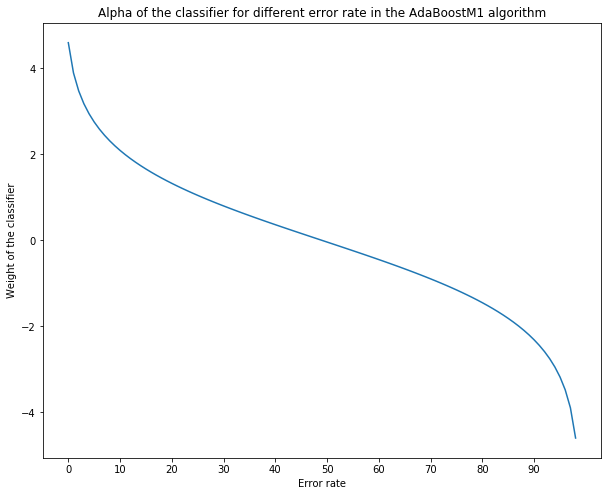

In [23]:
plt.figure(1,figsize=(10,8))
plt.title("Alpha of the classifier for different error rate in the AdaBoostM1 algorithm")
plt.xlabel("Error rate")
plt.ylabel("Weight of the classifier")
plt.plot(weigths)
plt.xticks(np.arange(0,100,10))
plt.legend()
plt.show()

As we see from the above plot, when the error rate cross the 50% , the weight become negative as we may have expected. This means that the worse a classifier performs, the less it counts in the strong learner. 

#### Exercise 2.3.
In your own words, explain some of the main differences between bagging
and boosting.

Boosting is a technique used to build a strong learner from multiples weak learners, where a weak learner is defined as a model whose probability of outputting the right prediction is just above chance with an edge of   $\gamma$ . The weak learners are integrated weighing their performance. Therefore the weak learner that performs worse than the others, will count less when integrated in the strong learner. In addition to this, after that a weak learner is added to the strong learner, the data that were correclty classified by this weak learner, will count less in the training of the next weak learner,while the misclassified datapoint will weigh more. Doing so means that each next weak learner will be more inclined to classify the samples miscalissified by the previous learners.
Bagging , which is a crasis of B(oostrap) AGG(regat)ING , is another ensemble algorithm which aims to improve the accuracy of a machine learning algorithm (usually decision three). It works as follows: from a dataset X , other n  X1...Xn different training dataset are built ( can have less or the same number of data point of the original dataset) with samples that are drawn uniformly and with replacment from the original dataset . This means that a sample can be present in many new datasets. Then it fits n models with the different training sets and it avarages the output, which can be the mean in the case of a regression problem, or just picking the output which has the most "votes"  from the models, in the case of a classification problem. 

#### Exercise 2.4
How does AdaBoost relate to gradient boosting?

Both AdaBoost and gradient boosting try to do the same thing, which is to combine many weak learners in a strong one to minimize the error of the classifier. Both can be thought as Arcing algorithm , which " is an acronym for Adaptive Reweighting and Combining. Each step in an arcing algorithm consists of a weighted minimization followed by a recomputation of the classifiers and weighted input.", as stated by Leo Breiman. The two algorithms differ on the way they train the weak learners. 
On one hand Adaboost trains the new weak learner changing the sample distribution adjusting the weights from the previous iteration. Doing this means that each next weak lernear will be more inclined to focus on the samples that were wrongly classified by the previous weak learner, as these will weigh more.AdaBoost also adjust the weights of the weak learner in the strong learner according to the error rate, so the better a weak learner performs, the more it will be counted its "vote" win the final classifier.
On the other hand, gradient boosting does not changes the sample distribution. In this case the weak learners are added in order to optimize a loss function, in a gradient descent fashion. Therefore the starting point is to have a model with a certain loss on a train set, and from there add at each iteration a weak learner that points the loss function towards a minimum. So the goal is to find an $F1(x)$ such that $F1(x)=F0+f(x)=y$ where y is the true value of the sample. This means that gradient boosting can be used with different kind of error functions , given that are differentiable, and also can be used on regression problems.

#### Exercise 2.5 
Similar to what you did for the random forest, find out what widely used
gradient boosting or AdaBoost implementations are available in your
favourite programming language and apply the method to a prediction
problem you find interesting (see, for instance the UCI Machine Learning
repository for interesting datasets). Write a short description (min. 100
words) of your findings, including what dataset and implementation you
used, how you set up your experiment, what the effect of different parameter
settings was, what the performance was, which variables where
important, etc.).

For the exercise we will try to predict wheter a person has diabates or not. The database can be found here: https://www.kaggle.com/uciml/pima-indians-diabetes-database. We have the following dimensions :

Pregnancies (Number of times pregnant),Glucose (Plasma glucose concentration a 2 hours in an oral glucose tolerance test), BloodPressure (Diastolic blood pressure (mm Hg)), SkinThickness (Triceps skin fold thickness (mm)), Insulin (2-Hour serum insulin (mu U/ml)), BMI (Body mass index (weight in kg/(height in m)^2)), DiabetesPedigreeFunction (Diabetes pedigree function), Age (Age (years)), Outcome (Class variable (0 or 1))

For the exercise we use the AdaBoost Classifier which is parte of the sklearn package. 

In [30]:
import pandas as pd

In [33]:
##we import the dataset
diab_pd = pd.read_csv("C:\\Users\\Luca\\Desktop\\RadboudUniversity\\Natural Computing\\assignments\\Ass4\\diabetes.csv")

In [34]:
diab_pd.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [35]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
model=AdaBoostClassifier(n_estimators=50, learning_rate=1.0)

We take the values(X) from the dataset to fit the model as well as the classes(Y)

In [37]:
array = diab_pd.values

X=array[:,0:8]
Y=array[:,8:9]

Then we can train the model. We will start from a baseline and then try to change the relevant parameters of the algorithm to see how the resuls may change

We start with 30 trees

In [78]:
seed=5
model = AdaBoostClassifier(n_estimators=30, random_state=seed)

In [80]:
model.fit(X,Y.ravel())

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=30, random_state=5)

In [83]:
model.score(X,Y)

0.8033854166666666

Then we can try to change the number of trees and see if and how the score changes accordingly

In [85]:
model1 = AdaBoostClassifier(n_estimators=50, random_state=seed)

In [87]:
model1.fit(X,Y.ravel())

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=5)

In [88]:
model1.score(X,Y)

0.82421875

It looks that incresing the number of tree increases the accuracy as we could have expected.
We can try to build different model adding each time 10 trees and then plot the score according to the number of trees.
We also save the importance given to each attributes of the dataset for each iteration.

In [154]:
##We take the columns names from the dataset
attributes=diab_pd.columns.values

Now we can build the different modesl and see how each performs. We also store the relative importance given to each attribute to plot later.

In [223]:
scores=[]
importances=[]
for i in range(10,500,10):
    model=AdaBoostClassifier(n_estimators=i, random_state=seed)
    model.fit(X,Y.ravel())
    scores.append(model.score(X,Y))
    importance=model.feature_importances_
    index=0
    importances.append(importance)

In [224]:
importances=np.asarray(importances)

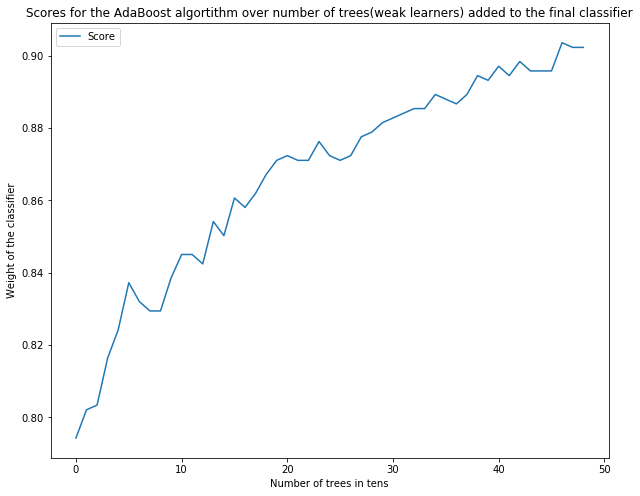

In [225]:
plt.figure(1,figsize=(10,8))
plt.title("Scores for the AdaBoost algortithm over number of trees(weak learners) added to the final classifier")
plt.xlabel("Number of trees in tens")
plt.ylabel("Weight of the classifier")
plt.plot(scores,label=("Score"))
plt.legend()
plt.show()

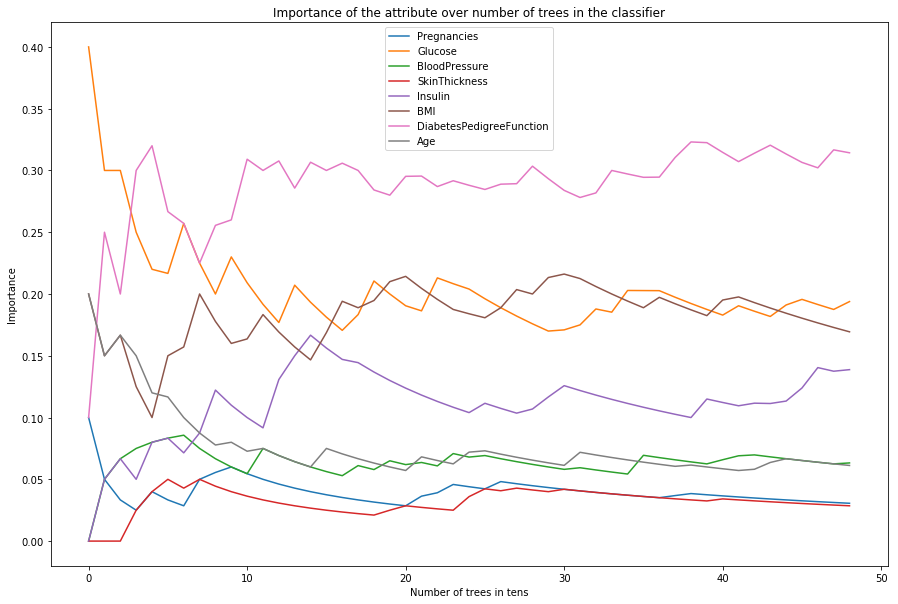

In [226]:
plt.figure(1,figsize=(15,10))
plt.title("Importance of the attribute over number of trees in the classifier")
plt.xlabel("Number of trees in tens")
plt.ylabel("Importance")
for i in range(0,np.shape(importances)[1]):
    name=attributes[i]
    plt.plot(importances[:,i:i+1],label=name)
plt.legend()
plt.show()

As we see from the above plots we can say that the ensemble method in this case works decently. We reach a maximum of just above 90% of correct classification with 500 weak learner, and we would expect the score to improve a little bit more adding each time more tree and then level off. On the second plot we can see how en each strong learner, the importance given to each attribute of the dataset changes. Although we can see a certain degree until we start building models with 100 trees, then the importances become relatively more stable. 